# Descriptive Analysis

When trying to understand your data, it is typically impossible to just look at raw data and get much insight. We need ways to turn a bunch of data into a smaller set of numbers that are easily digestible summaries of your data. This will make them understandable both for you and for the people you work with. We call these **descriptive statistics**.

## Objectives

- Use business context to guide exploratory analyses
- Pose clear business-relevant questions and answer them with data
- Identify limitations of data for solving business problems

In [1]:
# Imports!
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

## Sample Data

Let's build a simple dataset, based on a hypothetical survey of the number of pairs of shoes owned by 11 random people:

In [2]:
data = np.array([5, 6, 3, 4, 3, 4, 8, 8, 1, 8, 2])
data_df = pd.DataFrame(data, columns=["Pairs of Shoes"])

In [3]:
data_df

,Pairs of Shoes
0,5
1,6
2,3
3,4
4,3
5,4
6,8
7,8
8,1
9,8


## `df.describe()`

This dataset has a bunch of individual observations in a range of values. These observations have an **empirical distribution** describing how the values are distributed across this range. We'll shorten this to just **distribution** for now. Everything that follows is our attempt to understand the distribution of our data.

You can actually get a bunch of descriptive statistics from any `pandas` DataFrame using the `.describe()` method. This should be one of the first things you'll do when exploring a new dataset.

In [4]:
data_df.describe()

,Pairs of Shoes
count,11.000000
mean,4.727273
std,2.493628
min,1.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,8.000000


# Different Statistical Measures

## Measures of Center

One natural place to begin is to ask about where the **middle** of the data is. In other words, what is the value that is closest to our other values? 

There are three common measures used to describe the "middle":

- **Mean**: The sum of values / number of values
- **Median**: The value with as many values above it as below it
    - If the dataset has an even number of values, the median is the mean of the two middle numbers.
- **Mode**: The most frequent value(s)
    - A dataset can have multiple modes if multiple values are tied for the most frequent.

Let's see what we have for our example:

In [5]:
print(f"Mean: {data_df.mean()}")
print("*"*20)
print(f"Median: {data_df.median()}")
print("*"*20)
print(f"Mode: {data_df.mode()}")

Mean: Pairs of Shoes    4.727273
dtype: float64
********************
Median: Pairs of Shoes    4.0
dtype: float64
********************
Mode:    Pairs of Shoes
0               8


**Discussion**: If somebody asked you "How many pairs of shoes do people usually have?", how would you answer (based on these data)?

- I would answer with the mean. The mode is 8, which is captured in the mean. Using the median, wouldn't account for the high number of outlier values


## Measures of Spread

Another natural question is about the **spread** of the data. In other words, how wide a range of values do you have? And how close or far are they from the "middle"?

### Min, Max, and Range

The minimum and maximum values of a dataset tell you the full extent of the values of your dataset. The range of the dataset is the difference between those two values.

In [6]:
print(f"Min: {data.min()}")
print(f"Max: {data.max()}")
print(f"Range: {data.max() - data.min()}")

Min: 1
Max: 8
Range: 7


### Percentiles and IQR

You can also calculate values at various **percentiles** to understand the spread. An "Nth Percentile" value is the value that is greater than N% of other values. The 25th and 75th percentiles are commonly used to describe spread, and the **interquartile range (IQR)** is the difference between these two values.

See [the docs](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) for more specifics about how percentiles are calculated, which is surprisingly tricky.

In [7]:
print(f"25th Percentile: {np.percentile(data, 25)}")
print(f"75th Percentile: {np.percentile(data, 75)}")
print(f"IQR: {np.percentile(data, 75) - np.percentile(data, 25)}")

25th Percentile: 3.0
75th Percentile: 7.0
IQR: 4.0


### Standard Deviation

The **standard deviation** is in effect the distance from the mean of the "average" data point. It is defined as: $$\sqrt\frac{\Sigma(x_i - \bar{x})^2}{n}$$

In [8]:
print(f"Standard Deviation: {data.std()}")

Standard Deviation: 2.3775812419312765


In [15]:
np.std((data), ddof=1)

2.4936282437809005

# Visual Description

A picture is worth a thousand words - or numbers! Here we will show how to use histograms and box-and-whisker plots to describe your data.

## Histograms

One natural way of starting to understand a dataset is to construct a **histogram**, which is a bar chart showing the counts of the different values in the dataset.

There will usually be many distinct values in your dataset, and you will need to decide how many **bins** to use in the histogram. The bins define the ranges of values captured in each bar in your chart. 

Text(0.5, 1.0, 'Counts, 14 Bins')

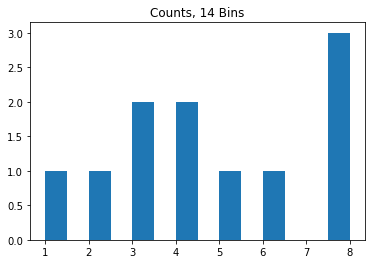

In [16]:
fig, ax = plt.subplots()
ax.hist(data, bins=14)
plt.title('Counts, 14 Bins')

Text(0.5, 1.0, 'Counts, 10 Bins')

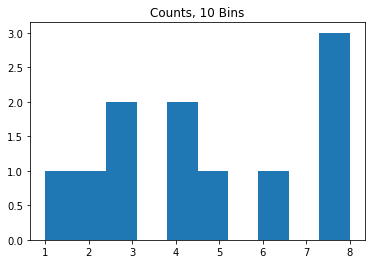

In [17]:
fig, ax = plt.subplots()
ax.hist(data, bins=10)
plt.title('Counts, 10 Bins')

Text(0.5, 1.0, 'Counts, 5 Bins')

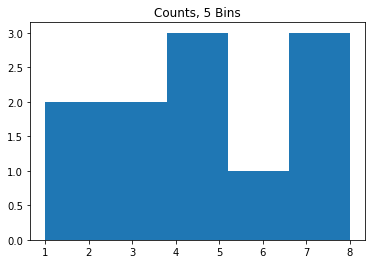

In [18]:
fig, ax = plt.subplots()
ax.hist(data, bins=5)
plt.title('Counts, 5 Bins')

Text(0.5, 1.0, 'Counts, 2 Bins')

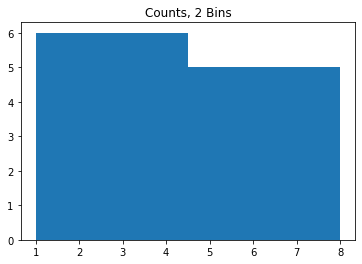

In [19]:
fig, ax = plt.subplots()
ax.hist(data, bins=2)
plt.title('Counts, 2 Bins')

## Box and Whisker Plot

A box-and-whisker plot can also be useful for visually summarizing your data by showing the min, IQR, and max.

Text(0.5, 1.0, 'Counts of Pairs of Shoes')

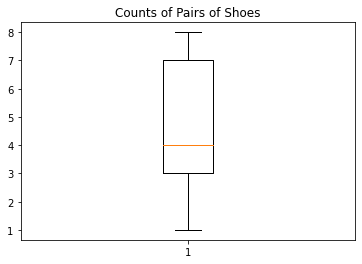

In [20]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.title('Counts of Pairs of Shoes')

# Addressing Business Questions

## Fast Food Data

In [21]:
ffood = pd.read_csv('data/Datafiniti_Fast_Food.csv')

In [22]:
ffood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [23]:
ffood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  object 
 1   dateAdded    10000 non-null  object 
 2   dateUpdated  10000 non-null  object 
 3   address      10000 non-null  object 
 4   categories   10000 non-null  object 
 5   city         10000 non-null  object 
 6   country      10000 non-null  object 
 7   keys         10000 non-null  object 
 8   latitude     10000 non-null  float64
 9   longitude    10000 non-null  float64
 10  name         10000 non-null  object 
 11  postalCode   10000 non-null  object 
 12  province     10000 non-null  object 
 13  sourceURLs   10000 non-null  object 
 14  websites     10000 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


In [24]:
ffood.describe()

,latitude,longitude
count,10000.000000,10000.000000
mean,37.337400,-93.106515
std,5.100276,15.787614
min,19.504168,-159.378066
25%,33.773973,-102.891796
50%,37.706263,-87.951149
75%,41.140722,-81.454907
max,64.840240,-67.463019


### Question 1

How many different restaurant chains are represented in the data? Visualize the numbers for the restaurants with 50 or more instances.

In [31]:
# Your code here
len(ffood['name'].unique())

571

In [48]:
counts = ffood['name'].value_counts()

high_counts = counts[counts >= 50]


### Question 2

Visualize the locations of restaurants in Buffalo, NY.

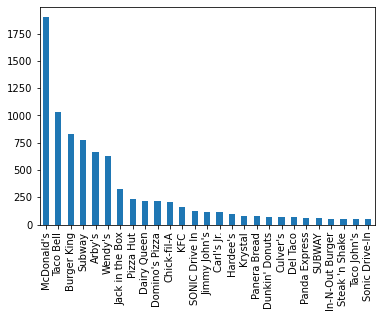

In [50]:
# Your code here
high_counts.plot(kind='bar');

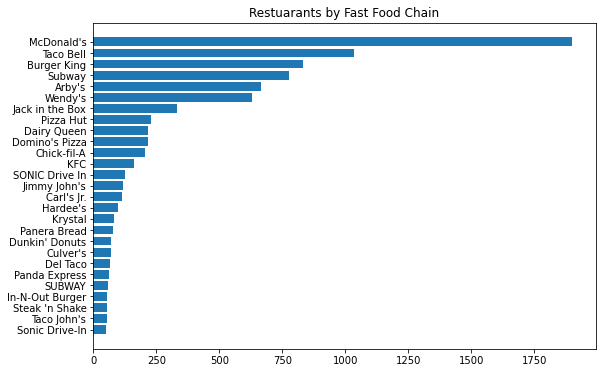

In [70]:
fig, ax = plt.subplots(figsize=(9,6))
ax.barh(y=high_counts.index,width=high_counts)
ax.set_title("Restuarants by Fast Food Chain")
ax.invert_yaxis();

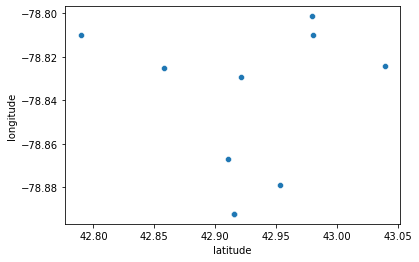

In [79]:
buffalo = ffood[ffood['city'] == 'Buffalo']

sns.scatterplot(data=buffalo,x='latitude',y='longitude');

# play around with maps !

### Your Turn: First Exercise!

In a breakout room, work on questions 3-5 below:

### Question 3

In this dataset, how many Taco Bell restaurants are there in Alaska, and in which cities are they?

In [96]:
# Your code here
alaska = ffood[ffood['province'] == 'AK']
alaska = alaska[alaska['name']== 'Taco Bell']
tb_alaska = alaska['city'].value_counts()
tb_alaska

Fairbanks    2
Anchorage    1
Name: city, dtype: int64

### Question 4

Convert the ZIP Codes to (five-digit) integers.

In [129]:
# Your code here
ffood['postalCode'] = ffood['postalCode'].str[:5].astype(int)
ffood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


### Question 5

Which restaurant chain has the greatest representation in San Francisco, CA? (This city covers all the ZIP Codes between 94100 and 94188, inclusive)

In [150]:
# Your code here
sf = ffood[(ffood['city']== 'San Francisco')]['name'].value_counts()
sf

Subway                     5
Burger King                2
Batter Up                  1
Domino's Pizza             1
Panda Express              1
VeganBurg                  1
McDonald's                 1
Chipotle Mexican Grill     1
Pollo Campero              1
De Afghanan Kabob House    1
Taqueria                   1
Name: name, dtype: int64

## Credit Card Data

In [ ]:
credit = pd.read_csv('data/BankChurners.csv').iloc[:, :-2]

In [ ]:
credit.head()

In [ ]:
credit.describe()

In [ ]:
credit['Attrition_Flag'].value_counts()

We work for a credit card company and are worried about customers churning (becoming attrited).

### Your Turn: Second Exercise!

In breakout rooms, work on questions 1-3 below:

### Question 1

Get the means of the numerical columns for the existing and the attrited customers separately.

In [ ]:
# Your code here

### Question 2

Visualize the distributions of total revolving balances for each group.

In [ ]:
# Your code here

### Question 3

Make two bar charts counting the numbers in each income category for each group separately.

In [ ]:
# Your code here

# Level Up: Other Shape Descriptors

Here are a few other ways that people describe the distributions of data.

## Moments

The mean is related to $\Sigma(x_i - \bar{x})$ while the standard deviation is related to $\Sigma(x_i - \bar{x})^2$. We could consider higher exponents as well, of the form $\Sigma(x_i - \bar{x})^n$. For each exponent $n>0$, we can define a related statistical **moment**. For $n=3$, the moment is called the **skewness**, which is a measure of how the mean and median diverge. For $n=4$, the moment is called the **kurtosis**, which is a measure of how many values are relatively far from the mean.

There are a few different definitions of skewness and kurtosis that are commonly used, but the basic quantities are:

- $\frac{\Sigma(x_i - \bar{x})^3}{n\sigma^3}$ (for skewness)
- $\frac{\Sigma(x_i - \bar{x})^4}{n\sigma^4}$ (for kurtosis)

For more on statistical moments, see [here](https://www.statisticshowto.datasciencecentral.com/what-is-a-moment/) and [here](https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics).

In [ ]:
# Will need the scipy stats library for these
from scipy import stats

### Skewness

![skew](images/skew.png)

In [ ]:
stats.skew(data)

### Kurtosis

![kurt](images/kurtosis.png)

In [ ]:
stats.kurtosis(data)

What if we want to visualize the three histograms together?

## Symmetry

In [ ]:
X = np.linspace(-3, 3, 40)
y = stats.norm.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
ax.vlines(x=0, ymin=0, ymax=0.5, colors = "black")
plt.title('Symmetric Distribution');

X = np.linspace(0, 1, 40)
y = stats.expon.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.title('Asymmetric Distribution');

## Modality

In [ ]:
X = np.linspace(0, 1, 40)
y = stats.uniform.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.ylim(0.5, 1.5)
plt.title('Flat Distribution');

X = np.linspace(-5, 5, 40)
y = stats.norm.pdf(X, loc=-2) + stats.norm.pdf(X, loc=2)\
+ 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.title('Bimodal Distribution');